In [56]:
# neural network

In [57]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# load dataset 
data = keras.datasets.fashion_mnist
#  fashion_mist berisikan gambar yang akan mennjadi data

In [59]:
(train_image, train_labels), (test_image, test_train) = data.load_data()
# load_dataset akan mengembalikan tuple, jadi buat tuple yang sesuai dengan yang ada di atas

In [60]:
# mengetahui ukuran train dataset
train_image.shape
# (60000, 28, 28) menyatakana ada 6000 data (baris terluar) dan 28,28 menyatakan panjang x lebar (matrilks dua dimensi) di dalam dari baris data

(60000, 28, 28)

In [61]:
i = 1
# ini merupakan data 28 x 28 yang ada di dalam data train 
for x in range(1): 
    print(f'data ke {i}')
    for y in range(28): 
        print(train_image[x][y])
    i += 1
# note : Ketika gambar diterjemahkan menjadi array, angka 0 sering kali mengacu pada intensitas piksel yang sangat rendah atau kehadiran warna yang rendah pada posisi tertentu dalam gambar

data ke 1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0
  0  1  1  0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
  54   0   0   0   1   3   4   0   0   3]
[  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
 144 123  23   0   0   0   0  12  10   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
 107 156 161 109  64  23  77 130  72  15]
[  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
 216 163 127 121 122 146 141  88 172  66]
[  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229
 223 223 215 213 164 127 123 196 229   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 183 225 216 223 228
 235 227 224 222 224 221 223 245 173   0]
[  0   0   0   0   0   0   0   0   0   

In [62]:
#  semua train labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [63]:
#  link fashion minist dataset : https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_train.csv
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


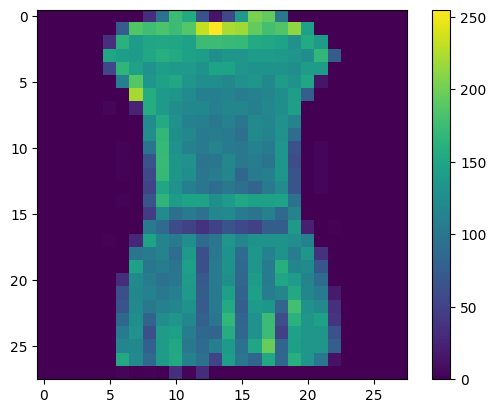

In [64]:
#  melihat apa yang isi dataset pada index 3
plt.figure()
plt.imshow(train_image[3])
plt.colorbar()

plt.show()
# ini merupakana gambar pada train_image index ke 1

In [65]:
#  data preprocessing 
# train_image = train_image / 255.0 
for x in range(1): 
    print(f'data ke {i}')
    for y in range(28): 
        print(train_image[x][y])
    i += 1


data ke 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0 13 73  0  0  1  4  0  0  0
  0  1  1  0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
  54   0   0   0   1   3   4   0   0   3]
[  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
 144 123  23   0   0   0   0  12  10   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
 107 156 161 109  64  23  77 130  72  15]
[  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
 216 163 127 121 122 146 141  88 172  66]
[  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229
 223 223 215 213 164 127 123 196 229   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 183 225 216 223 228
 235 227 224 222 224 221 223 245 173   0]
[  0   0   0   0   0   0   0   0   0   

In [66]:
train_image = train_image / 255.0 
#  dibagi 255 agar data yang dihasilkana adalah antara 0 dan 1 
test_image = test_image / 255.0 
#  /255 ini merupakan bentuk dari normalisasi data

In [67]:
# memmbuat model deep learning neural network 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    # flatten akan mengubah matriks yang awalnya 28 x 28 akan menjadi satu matiks dengan jumlah elemen sama dengan 784  
    keras.layers.Dense(128, activation='relu'), 
    #  yang kedua ini akan berperan sebgai hidden layer 
    #  jadi di dalam hidden layer akan ada 128 node 
    keras.layers.Dense(10, activation='softmax')
    # di dalam output layer terdapat 10 node karenea ada 10 class / catgory
    #  yang ketiga ini akan berperan sebagai outut layer
    # dengan activation='softmax' maka yang dihsilakan nilai dari range 0 dan 1 
])

In [68]:
# compiling the model 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# link adam optimization : https://www.youtube.com/watch?v=JXQT_vxqwIs

In [69]:
#  train the model 
model.fit(train_image, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 896us/step - loss: 0.5037 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.3810 - accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.3394 - accuracy: 0.8745
Epoch 4/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.3135 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 2s 947us/step - loss: 0.2970 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.2841 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 2s 963us/step - loss: 0.2710 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2587 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.2528 - accuracy: 0.9057
Epoch 10/10
1875/1875 [==============================] - 2s 910u

In [70]:
#  evaluate the model
loss, acc = model.evaluate(test_image, test_train, verbose=1)
#  kembalian dari evaliate adalah dict | Any | list
print(f'akurasi yang diperoleh adalah : {acc}')
#  akurasi yang diperoleh adalah : 0.8853999972343445
#  karena akurasi yang diperoleh lebih kecil dibandingkan dengan akurasi saat dilakukan training maka bisa disimpulkan bahwa model yang sudah dirancang mengalami overfitting karena model mengingat semua pola yang ada di saat di lakukan pelatihan 
#  dan ketika bertemu dengan data baru yang tidak pernah dilihat sebelumnya saat pelatihan maaka otomatis model akan sedikit kebingungan dan ini menyebabkan akurasi sedikit menurun 

313/313 [==============================] - 0s 651us/step - loss: 0.3467 - accuracy: 0.8843
akurasi yang diperoleh adalah : 0.8842999935150146


In [71]:
#  melakukan validasi prediksi pada model yang sudah dibuat
prediction = model.predict(test_image)
print(f'isi dari prediction : {prediction}')

313/313 [==============================] - 0s 580us/step
isi dari prediction : [[3.93853554e-07 1.81169316e-12 1.72302095e-09 ... 1.03266090e-02
  6.81497028e-08 9.89180505e-01]
 [2.05035417e-06 2.53746232e-15 9.99116123e-01 ... 3.70529057e-15
  6.15013387e-11 2.71305225e-15]
 [4.97954638e-08 1.00000000e+00 2.89665708e-10 ... 7.78514270e-27
  7.51705352e-14 7.17990548e-16]
 ...
 [1.34405345e-05 5.51659890e-12 1.42825149e-06 ... 2.93032417e-12
  9.99965787e-01 7.01923498e-15]
 [8.06221507e-08 9.99862552e-01 4.32035030e-08 ... 2.55645449e-15
  3.60339558e-09 7.32494998e-09]
 [2.29556594e-04 2.90301443e-07 7.29606518e-06 ... 1.14064058e-02
  8.93982127e-04 1.24841332e-04]]


9
Ankle boot


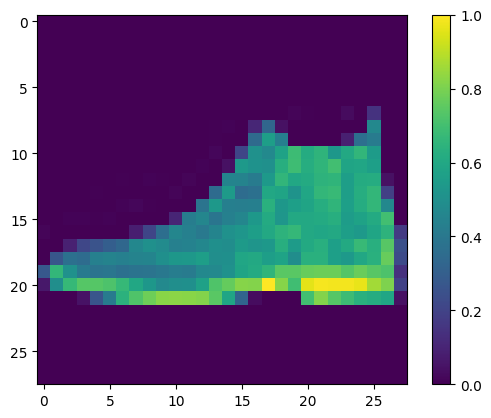

In [72]:
#  apa yanga akan dikeluarkana oleh model jika dimasukan data dengan index ke 0 pada data test
print(f'{np.argmax(prediction[0])}')

print(class_name[np.argmax(prediction[0])])

plt.figure()
plt.imshow(test_image[0])
plt.colorbar()
plt.grid(False)
plt.show()
# # class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# berdasarkan class_name, yanga ada di index ke 9 adalah ankle boot
#  "nila tertinggi dari array yang digunakan untuk menentukan kategori class,"

In [73]:
prediction[2]
# yang dihasilikan adalah array([1.2584256e-07, 9.9999988e-01, 3.4647469e-11, 1.6510233e-09,
    #    3.2504641e-09, 6.1097169e-20, 2.1857302e-11, 1.2293774e-24,
    #    2.4066699e-12, 9.1616263e-21], dtype=float32)
# yang dimana setiap posisi merupakana probabilitas dari tebakan berdasarkan kelas, dan pada prediksi index ke 2, nilai tertinggi yaitu index 1 yang dimana index 1 merupakan kategori trousher

array([4.9795464e-08, 1.0000000e+00, 2.8966571e-10, 1.2484426e-08,
       5.5813256e-09, 2.1008475e-21, 2.6433624e-11, 7.7851427e-27,
       7.5170535e-14, 7.1799055e-16], dtype=float32)

In [74]:
np.argmax(prediction[2])
# argmax akan mengembalikan index dengan nilai tertinggi

1

1
Trouser


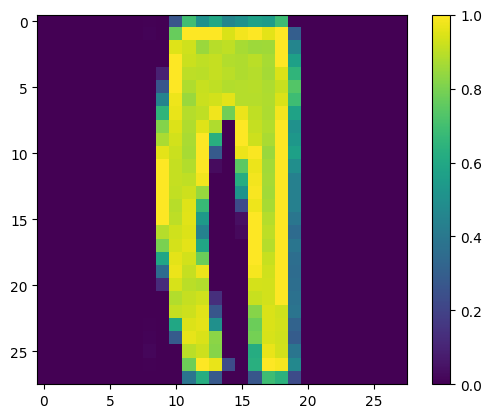

In [75]:
print(f'{np.argmax(prediction[2])}')

print(class_name[np.argmax(prediction[2])])

plt.figure()
plt.imshow(test_image[2])
plt.colorbar()
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 14ms/step


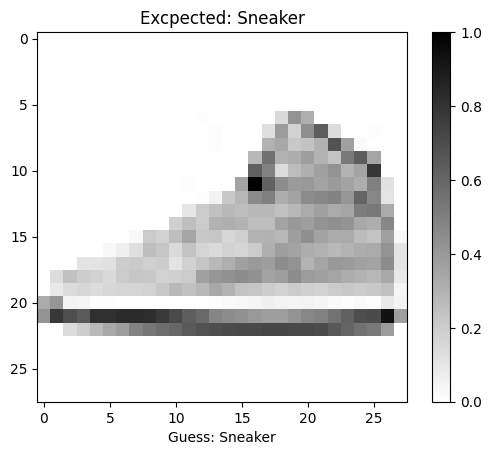

In [77]:
# just make it once

def call_model(images, labels):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([images]))
    #  jangan menuliskan  prediction = model.predict(np.array(images)) ini akan menyebabkan graph error d
    prediction_result = class_name[np.argmax(prediction)]
    show_image(images, class_names[labels], prediction_result)
def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_image[num]
label = test_train[num]
call_model(image, label)